In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates, cm, colors
from datetime import datetime, timedelta
from natsort import natsorted
import numpy as np
from utils import *
from cartopy.crs import *
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import glob
from matplotlib.patches import ConnectionPatch
import contextlib
from PIL import Image
import pycountry
import scienceplots
plt.style.use(['science','no-latex', 'grid', 'nature'])
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15


import warnings
warnings.filterwarnings('ignore')

In [5]:
# read all data
s_flights = pd.read_csv('s_flights.csv')  # load selected countries' flights from query result
airports = pd.read_csv('airports.csv')  # airports

s_flights['time'] = pd.to_datetime(s_flights['time'])  # convert time column to datetime object

In [6]:
# feature extractions
s_flights = featurize_flights(s_flights)

# convert datetime object to date object
s_flights['time'] = pd.to_datetime(s_flights['time'].dt.date)

# Data Visualization

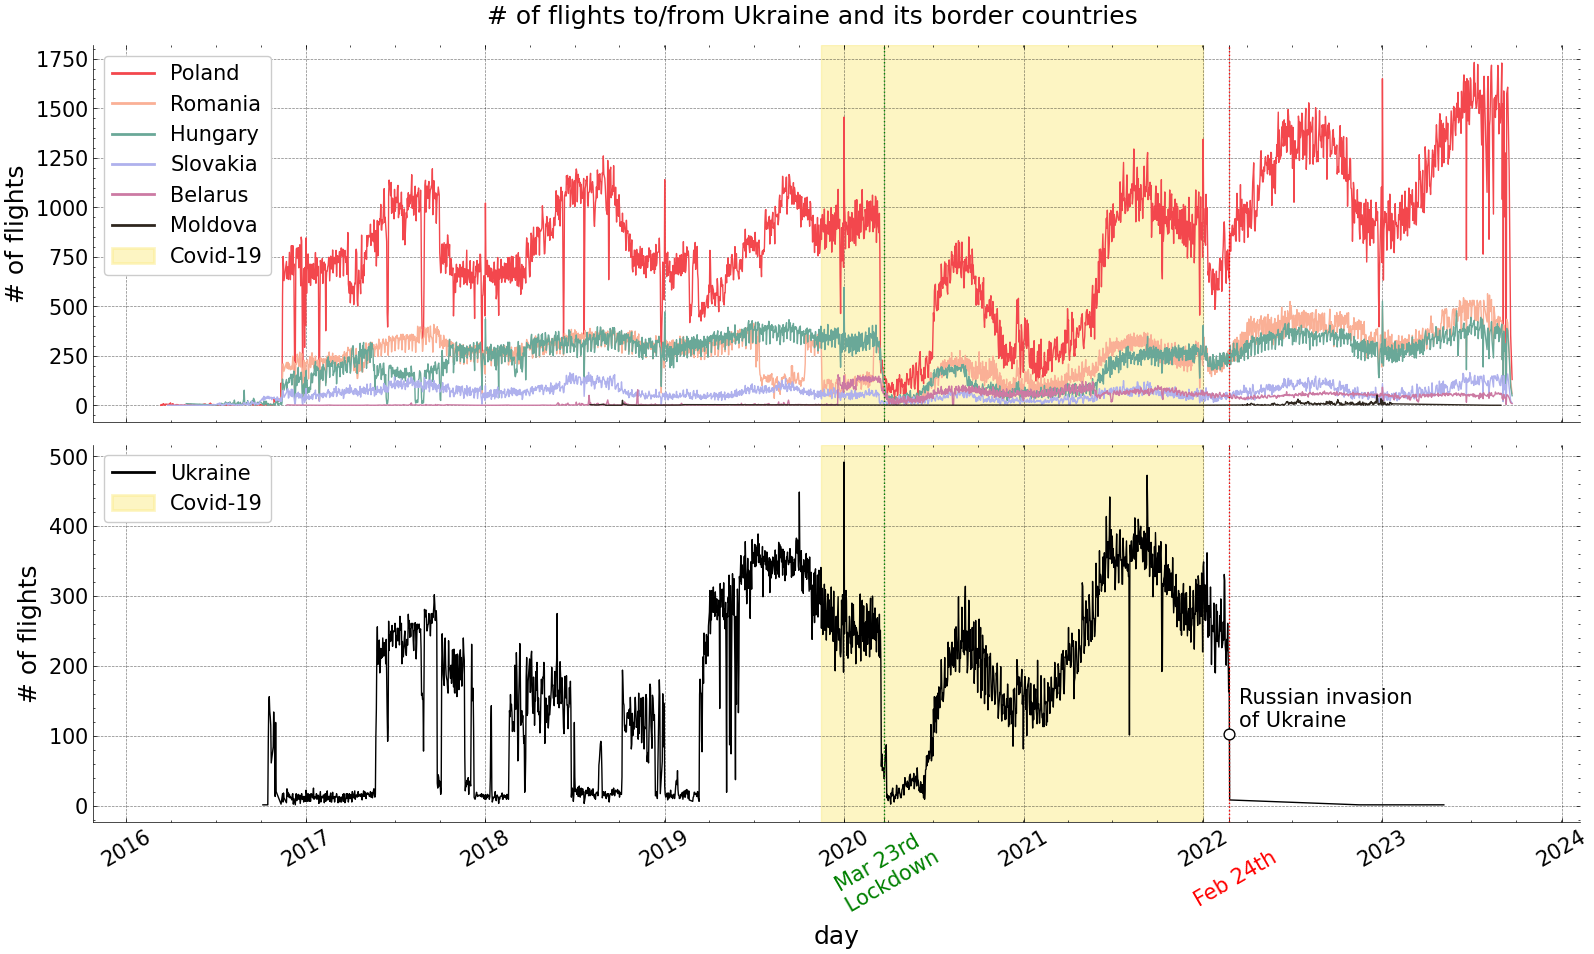

In [7]:
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

ax[0] = plot_tseries(get_flights(s_flights, 'PL'), c='#F3474D', ax = ax[0], label='Poland')
ax[0] = plot_tseries(get_flights(s_flights, 'RO'), c='#FAB096', ax = ax[0], label='Romania')
ax[0] = plot_tseries(get_flights(s_flights, 'HU'), c='#6AA898', ax = ax[0], label='Hungary')
ax[0] = plot_tseries(get_flights(s_flights, 'SK'), c='#AFB1ED', ax = ax[0], label='Slovakia')
ax[0] = plot_tseries(get_flights(s_flights, 'BY'), c='#CC7AA3', ax = ax[0], label='Belarus')
ax[0] = plot_tseries(get_flights(s_flights, 'MD'), c='#2F271F', ax = ax[0], label='Moldova')
ax[1] = plot_tseries(get_flights(s_flights, 'UA'), ax = ax[1], label='Ukraine')
        
labels = list(ax[1].get_xticklabels())
ticks = list(ax[1].get_xticks())
ticks.insert(4, 19046.35)
labels.insert(4, "\nFeb 24th")
ticks.insert(5, 18343)
labels.insert(5, "Mar 23rd\n Lockdown")
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
labels = list(ax[1].get_xticklabels())
labels[4].set_color('red')
labels[4].set_ha('center')
labels[5].set_color('green')
labels[5].set_ha('center')

ax[0].axvspan(get_dt("2019-11-16"), get_dt("2021-12-31"), color='#FCEC89', zorder =0, alpha=0.5, label='Covid-19')
ax[1].axvspan(get_dt("2019-11-16"), get_dt("2021-12-31"), color='#FCEC89', zorder = 0, alpha=0.5, label='Covid-19')

daily_counts = get_flights(s_flights, 'UA').groupby(['time']).size()
war_stamp = datetime.strptime("2022-02-23:00-00", '%Y-%m-%d:%H-%M')
war_count = (daily_counts.loc[war_stamp] + daily_counts.loc[war_stamp + pd.Timedelta(days=1)])/2
ax[1].scatter(war_stamp, war_count, facecolor='white', edgecolor='k',zorder =1000, s=60)
ymin, ymax = ax[1].get_ylim()
ax[1].vlines(war_stamp, ymin-100, ymax+100, color='r', linewidth=1, zorder=4, linestyles='dotted')
ax[1].vlines(get_dt("2020-03-23"), ymin-100, ymax+100, color='g', linewidth=1, zorder=4, linestyles='dotted')

ax[1].set_ylim((ymin, ymax))

ymin, ymax = ax[0].get_ylim()
ax[0].vlines(war_stamp, ymin-100, ymax+100, color='r', linewidth=1, zorder=4, linestyles='dotted')
ax[0].vlines(get_dt("2020-03-23"), ymin-100, ymax+100, color='g', linewidth=1, zorder=4, linestyles='dotted')
ax[0].set_ylim((ymin, ymax))
ax[1].text(19046.35 + ax[1].get_xlim()[1]*0.001, 1.1*war_count, "Russian invasion\nof Ukraine")

ax[1].set_xlabel('day')
ax[1].set_ylabel('# of flights')
ax[0].set_ylabel('# of flights')

leg = ax[0].legend(loc=2)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
leg = ax[1].legend(loc=2)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)

fig.suptitle("# of flights to/from Ukraine and its border countries", y=1.02)

plt.savefig('plots/time_series.png', bbox_inches=None, dpi=150)

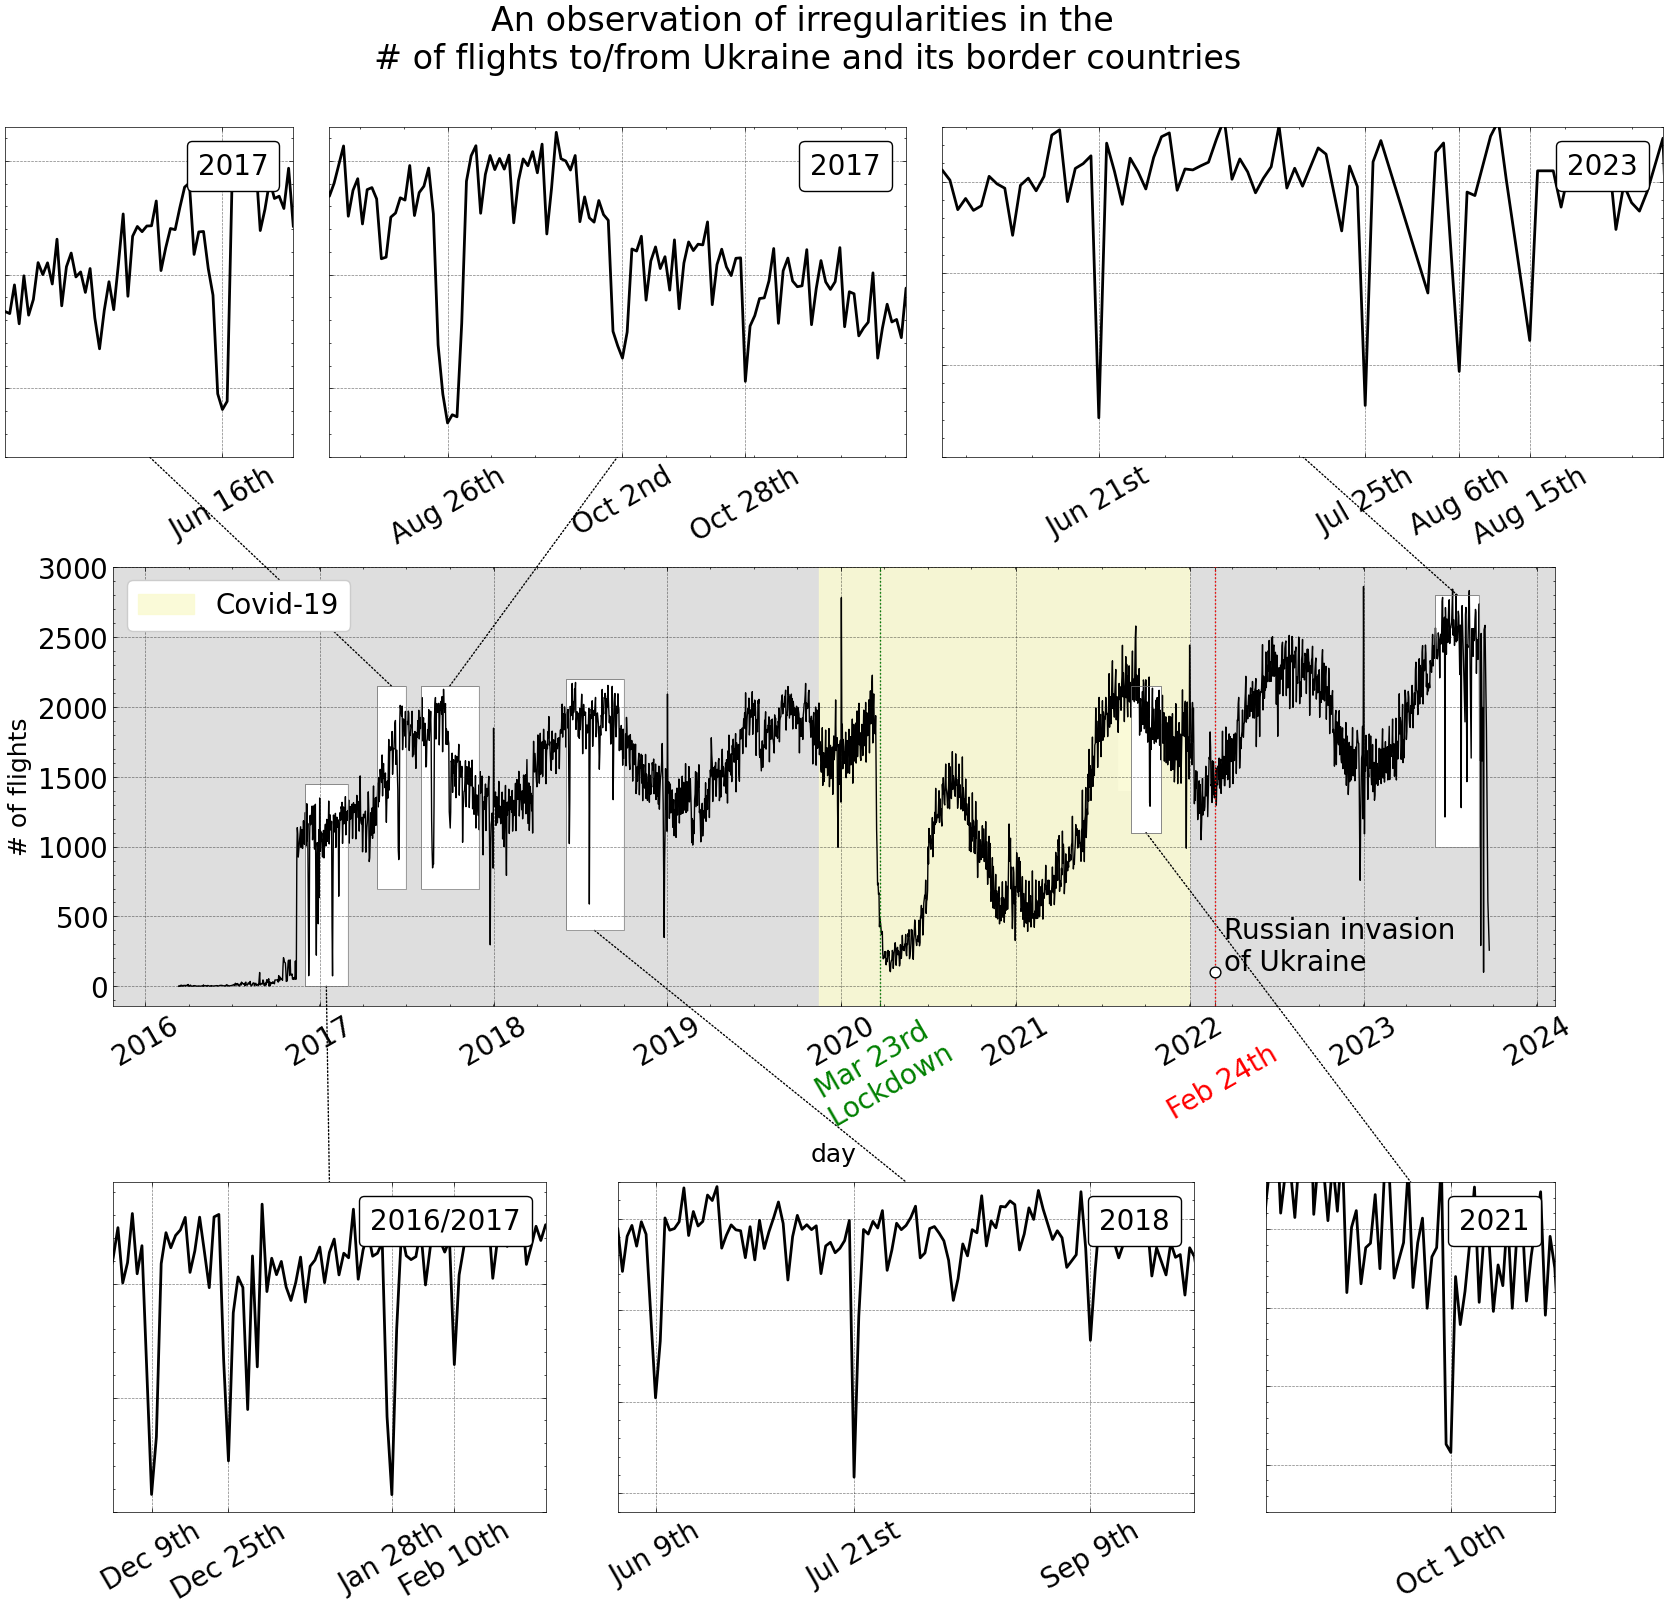

In [8]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
fig, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True)

ax = [ax, ax]
color = 'royalblue'

ax[1] = plot_tseries(s_flights, c='k', ax = ax[1])
        
labels = list(ax[1].get_xticklabels())
ticks = list(ax[1].get_xticks())
ticks.insert(4, 19046.35)
labels.insert(4, "\nFeb 24th")
ticks.insert(5, 18343)
labels.insert(5, "Mar 23rd\n Lockdown")
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
labels = list(ax[1].get_xticklabels())
labels[4].set_color('red')
labels[4].set_ha('center')
labels[5].set_color('green')
labels[5].set_ha('center')

daily_counts = get_flights(s_flights, 'UA').groupby(['time']).size()
war_stamp = datetime.strptime("2022-02-23:00-00", '%Y-%m-%d:%H-%M')
war_count = (daily_counts.loc[war_stamp] + daily_counts.loc[war_stamp + pd.Timedelta(days=1)])/2
ax[1].scatter(war_stamp, war_count, facecolor='white', edgecolor='k',zorder =1000, s=60)
ymin, ymax = ax[1].get_ylim()
ax[1].vlines(war_stamp, ymin-100, ymax+100, color='r', linewidth=1, zorder=4, linestyles='dotted')
ax[1].vlines(get_dt("2020-03-23"), ymin-100, ymax+100, color='g', linewidth=1, zorder=4, linestyles='dotted')

ax[1].set_ylim((ymin, ymax))

ymin, ymax = ax[0].get_ylim()
# ax[0].vlines(war_stamp, ymin-100, ymax+100, color='r', linewidth=1, zorder=4, linestyles='dotted')
ax[0].set_ylim((ymin, ymax))
ax[1].text(19046.35 + ax[1].get_xlim()[1]*0.001, 1.1*war_count, "Russian invasion\nof Ukraine")

ax[1].set_xlabel('day')
ax[1].set_ylabel('# of flights')
ax[0].set_ylabel('# of flights')


ymin, ymax = ax[1].get_ylim()
xmin, xmax = ax[1].get_xlim()

mask_color = '#dedede'
mask_alpha = 1.

ax[1].axvspan(get_dt("2014-12-01"), get_dt("2016-12-01"), color=mask_color, zorder = 0, alpha=mask_alpha)
ax[1].axhspan(-1000, 0, color=mask_color, zorder = 0, alpha=mask_alpha)

z1 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2016-12-01"), get_tt(s_flights, "2017-3-01"), 0, 1445],
    [0, -1.15, 0.3, 0.75],
    {2:0},
    box_kwargs = {'lw': 0.5}
)
shade_tb(ax[1], [get_tt(s_flights, "2016-12-02"), get_tt(s_flights, "2017-3-01"), 0, 1445])
ax[1].axvspan(get_dt("2017-3-01"), get_dt("2017-05-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

z2 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2017-05-01"), get_tt(s_flights, "2017-07-01"), 700, 2150],
    [-0.075, 1.25, 0.2, 0.75],
    {0:2},
    box_kwargs = {'lw': 0.5}
)
shade_tb(ax[1], [get_tt(s_flights, "2017-05-01"), get_tt(s_flights, "2017-07-01"), 700, 2150])
ax[1].axvspan(get_dt("2017-07-01"), get_dt("2017-08-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

z3 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2017-08-01"), get_tt(s_flights, "2017-12-01"), 700, 2150],
    [0.15, 1.25, 0.4, 0.75],
    {0:2},
    box_kwargs = {'lw': 0.5}
)
shade_tb(ax[1], [get_tt(s_flights, "2017-08-01"), get_tt(s_flights, "2017-12-01"), 700, 2150])
ax[1].axvspan(get_dt("2017-12-01"), get_dt("2018-06-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

z5 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2018-06-01"), get_tt(s_flights, "2018-10-01"), 400, 2200],
    [0.35, -1.15, 0.4, 0.75],
    {2:0},
    box_kwargs = {'lw': 0.5}
)
shade_tb(ax[1], [get_tt(s_flights, "2018-06-01"), get_tt(s_flights, "2018-10-01"), 400, 2200])
ax[1].axvspan(get_dt("2018-10-01"), get_dt("2021-08-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

# z7 = zoom_window(
#     ax[0],
#     [get_tt(s_flights, "2019-06-01"), get_tt(s_flights, "2019-10-01"), 1400, 2150],
#     [0.725, 1.2, 0.5, 0.75],
#     {0:2},
#     box_kwargs = {'lw': 0.5}
# )
# shade_tb(ax[1], [get_tt(s_flights, "2019-06-01"), get_tt(s_flights, "2019-10-01"), 1400, 2150])
# ax[1].axvspan(get_dt("2019-10-01"), get_dt("2021-08-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

shade_tb(ax[1], [get_tt(s_flights, "2021-08-01"), get_tt(s_flights, "2021-10-01"), 1400, 2150])
ax[1].axvspan(get_dt("2021-10-01"), get_dt("2023-06-01"), color=mask_color, zorder = 0, alpha=mask_alpha)

z9 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2023-06-01"), get_tt(s_flights, "2023-09-01"), 1000, 2800],
    [0.575, 1.25, 0.5, 0.75],
    {0:2},
    box_kwargs = {'lw': 0.5}
)
shade_tb(ax[1], [get_tt(s_flights, "2023-06-01"), get_tt(s_flights, "2023-09-01"), 1000, 2800])
ax[1].axvspan(get_dt("2023-09-01"), get_dt("2024-08-01"), color=mask_color, zorder = 0, alpha=mask_alpha)


ax[1].set_xlim((xmin, xmax))
ax[1].set_ylim((ymin, ymax))
ax[1].spines[['right', 'top']].set_visible(True)

plot_tseries(s_flights, ax = z1, freq='M', c='k', kwargs = {'linewidth':2})
plot_tseries(s_flights, ax = z2, freq='M', c='k', kwargs = {'linewidth':2})
plot_tseries(s_flights, ax = z3, freq='M', c='k', kwargs = {'linewidth':2})
plot_tseries(s_flights, ax = z5, freq='M', c='k', kwargs = {'linewidth':2})
plot_tseries(s_flights, ax = z9, freq='M', c='k', kwargs = {'linewidth':2})


ax[1].axvspan(get_dt("2019-11-16"), get_dt("2021-12-31"), color='lightgoldenrodyellow', zorder = 0, alpha=0.85, label='Covid-19')
ax[0].legend(loc=2)

z8 = zoom_window(
    ax[0],
    [get_tt(s_flights, "2021-09-01"), get_tt(s_flights, "2021-11-01"), 1100, 2150],
    [0.8, -1.15, 0.2, 0.75],
    {2:0},
    box_kwargs = {'lw': 0.5}
)
plot_tseries(s_flights, ax = z8, freq='M', c='k', kwargs = {'linewidth':2})
for z in [z1, z2, z3, z5, z8, z9]:
    z.set_xlabel('')

z3.set_xticks([])
z3.set_xticklabels([])
add_ticks(
    z3,
    get_range(s_flights, "2017-08-01", "2017-12-01"),
    [
        "2017-08-26",
        "2017-10-02",
        "2017-10-28"
    ],
    [
        "Aug 26th",
        "Oct 2nd",
        "Oct 28th"
    ],
    locator = dates.DayLocator()
)
add_label(z3, '2017')

z5.set_xticks([])
z5.set_xticklabels([])
add_ticks(
    z5,
    get_range(s_flights, "2018-06-01", "2018-10-01"),
    [
        "2018-07-21",
        "2018-06-09",
        "2018-09-09"
    ],
    [
        "Jul 21st",
        "Jun 9th",
        "Sep 9th"
    ],
    locator = dates.DayLocator()
)
add_label(z5, '2018')

z9.set_xticks([])
z9.set_xticklabels([])
add_ticks(
    z9,
    get_range(s_flights, "2023-06-01", "2023-09-01"),
    [
        "2023-06-21",
        "2023-07-25",
        "2023-08-06",
        "2023-08-15"
    ],
    [
        "Jun 21st",
        "Jul 25th",
        "Aug 6th",
        "Aug 15th"
    ],
    locator = dates.DayLocator()
)
add_label(z9, '2023')

z1.set_xticks([])
z1.set_xticklabels([])
add_ticks(
    z1,
    get_range(s_flights, "2016-12-01", "2017-03-01"),
    [
        "2017-01-28",
        "2016-12-09",
        "2016-12-25",
        "2017-02-10"
    ],
    [
        "Jan 28th",
        "Dec 9th",
        "Dec 25th",
        "Feb 10th"
    ],
    locator = dates.DayLocator()
)
add_label(z1, '2016/2017')

z2.set_xticks([])
z2.set_xticklabels([])
add_ticks(
    z2,
    get_range(s_flights, "2017-05-01", "2017-07-01"),
    [
        "2017-06-16"
    ],
    [
        "Jun 16th"
    ],
    locator = dates.DayLocator()
)
add_label(z2, '2017')

z8.set_xticks([])
z8.set_xticklabels([])
add_ticks(
    z8,
    get_range(s_flights, "2021-09-01", "2021-11-01"),
    [
        "2021-10-10"
    ],
    [
        "Oct 10th"
    ],
    locator = dates.DayLocator()
)
add_label(z8, '2021')
fig.suptitle("An observation of irregularities in the \n# of flights to/from Ukraine and its border countries", y=1.87)

plt.savefig('plots/time_series_breakdown.png', bbox_inches=None, dpi=150)

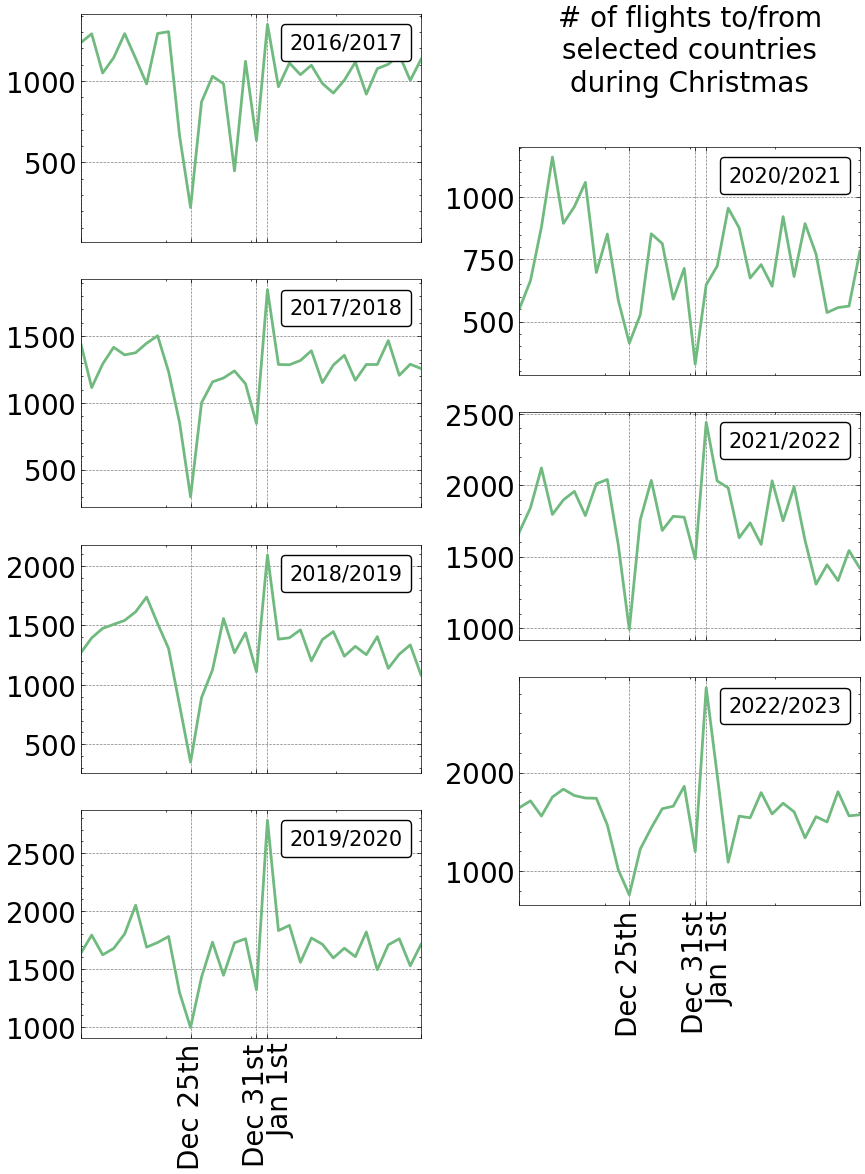

In [9]:
plt.style.use(['science','no-latex', 'grid', 'nature'])
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.figure(figsize=(9, 12))
axes = [plt.subplot2grid((8, 2), (0, 0), rowspan=2)]
axes.append(
    plt.subplot2grid((8, 2), (2, 0), rowspan=2)#, sharex=axes[-1])
)
axes.append(
    plt.subplot2grid((8, 2), (4, 0), rowspan=2)#, sharex=axes[-1])
)
axes.append(
    plt.subplot2grid((8, 2), (6, 0), rowspan=2)#, sharex=axes[-1])
)
axes.append(
    plt.subplot2grid((8, 2), (1, 1), rowspan=2)
)
axes.append(
    plt.subplot2grid((8, 2), (3, 1), rowspan=2)#, sharex=axes[-1])
)
axes.append(
    plt.subplot2grid((8, 2), (5, 1), rowspan=2)#, sharex=axes[-1])
)

colors = {
    2017:'#F3474D',
    2018:'#FAB096',
    2019:'#6AA898',
    2020:'#AFB1ED',
    2021:'#CC7AA3',
    2022:'#2F271F',
    2023:'royalblue'
}
y = 2016
i=0
while y < 2023:
    christmas = s_flights[(s_flights['time'] >= f"{y}-12-01") & (s_flights['time'] <= f"{y+1}-02-01")][['time']]
    christmas['time'] = christmas['time'].apply(lambda dt: get_dt(f"2020-{dt.strftime('%m-%d')}") if dt.month == 12 else get_dt(f"2021-{dt.strftime('%m-%d')}"))
    g = christmas.groupby('time', as_index=False).size()
    axes[i].plot(g['time'], g['size'], color='#70BA7F', linewidth=2, label=f'{y}/{y+1}')

    text = AnchoredText(
        f'{y}/{y+1}',
        loc=1,
        frameon=True,
    )
    
    text.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    axes[i].add_artist(text)
    axes[i].set_xlim((get_tt(christmas, "2020-12-15", locator = dates.MonthLocator(bymonthday=15)), get_tt(christmas, "2021-01-15", locator = dates.MonthLocator(bymonthday=15))))
    y += 1
    i += 1
    locator = dates.MonthLocator(bymonthday=15)
    axes[i-1].xaxis.set_major_locator(locator)
    if i in [4, 7]:
        axes[i-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))

    axes[i-1].set_xticklabels([])
    
    ticks = list(axes[i-1].get_xticks())
    labs = list(axes[i-1].get_xticklabels())
    ticks.append(get_tt(christmas, "2020-12-25", locator=dates.DayLocator()))
    ticks.append(get_tt(christmas, "2020-12-31", locator=dates.DayLocator()))
    ticks.append(get_tt(christmas, "2021-01-01", locator=dates.DayLocator()))
    axes[i-1].set_xticks(ticks)
    if i in [4, 7]:
        labs.append('Dec 25th')
        labs.append('Dec 31st')
        labs.append('Jan 1st')
        axes[i-1].set_xticklabels(labs, rotation=90)
        
        labs = list(axes[i-1].get_xticklabels())
        for l in labs:
            if 'Jan' in l.get_text():
                l.set_ha('left')
plt.tight_layout(h_pad=-4.5)
axes[4].set_title('# of flights to/from\nselected countries\nduring Christmas', pad = 40)
#plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('christmas.png', bbox_inches=None, dpi=150)

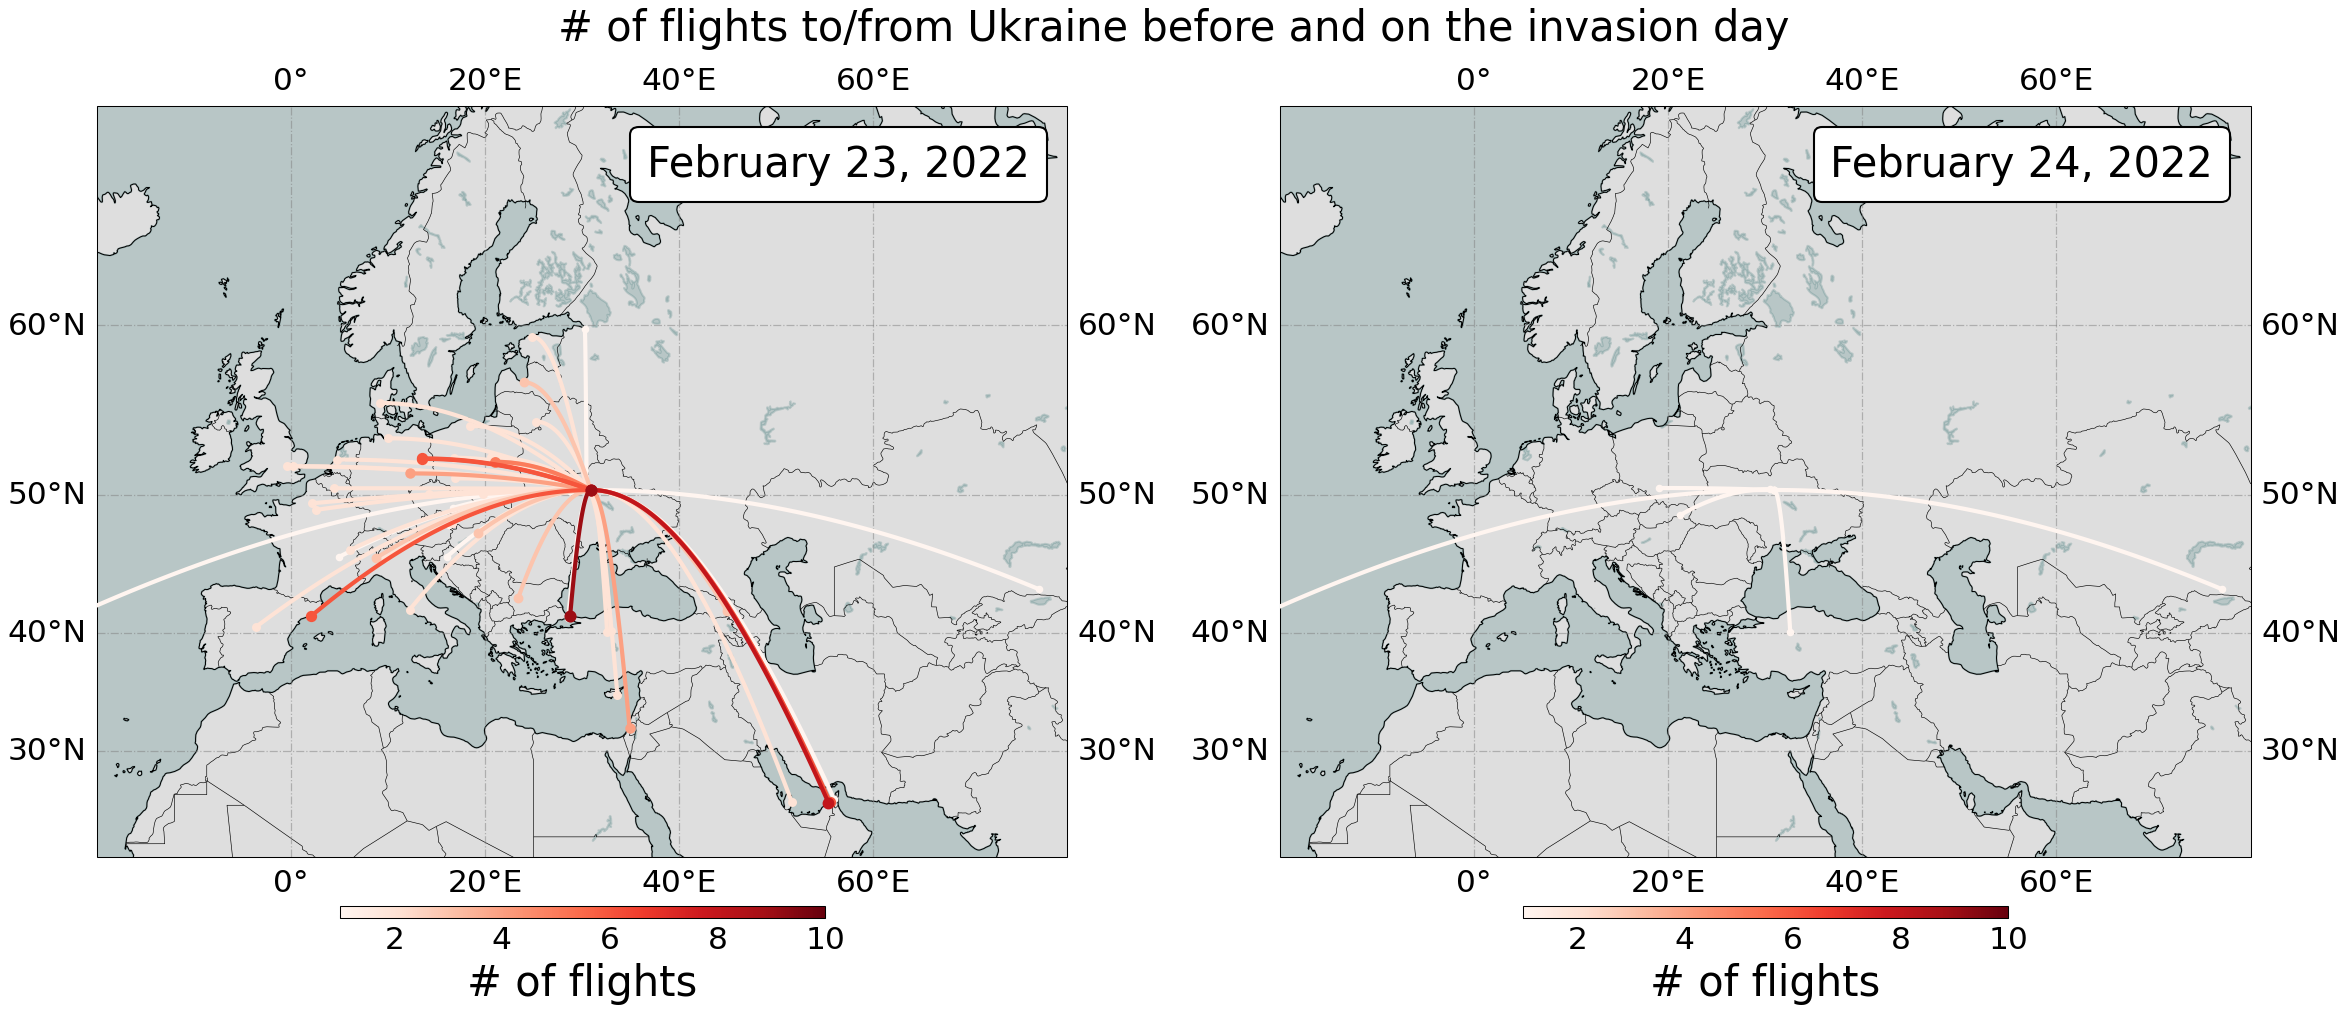

In [10]:
plt.style.use(['science','no-latex', 'grid', 'nature'])
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
bounds=(-20, 80, 20, 60)
    
ua_flights = get_flights(s_flights, 'UA').dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 9), dpi=150, subplot_kw=dict(projection=Mercator()))

plot_date(ua_flights, get_dt("2022-02-23"), bounds=bounds, ax = axes[0], vmin=0, vmax=10, arc_height = 0.01)
plot_date(ua_flights, get_dt("2022-02-24"), bounds=bounds, ax = axes[1], vmin=0, vmax=10, arc_height = 0.01)
plt.suptitle("# of flights to/from Ukraine before and on the invasion day", y=0.825, fontsize=20)
plt.tight_layout()
plt.savefig('plots/invasion_date_comparison.png', bbox_inches=None, dpi=150)

In [11]:
heatmap = ua_flights_war_period[['dep_country', 'arr_country', 'time']]
heatmap.loc[~(heatmap['arr_country'] == 'UA'), 'dep_country'] = np.nan
heatmap['non_ua_country'] = heatmap['dep_country'].fillna(heatmap['arr_country'])
heatmap = heatmap[heatmap['non_ua_country'] != 'UA'][['time', 'non_ua_country']] # drop local flights and unwanted columns
times = heatmap['time'].unique()
heatmap['time'] = heatmap['time'].dt.strftime('%Y-%m')#apply(lambda x: datetime.strptime(x, '%Y-%W'))

iso_name = dict(zip((c.alpha_2 for c in pycountry.countries), (c.name for c in pycountry.countries)))
heatmap['non_ua_country'] = heatmap['non_ua_country'].apply(lambda c: iso_name[c])

heatmap = pd.crosstab(heatmap['time'], heatmap['non_ua_country'])
converter = dict(zip(times.strftime('%Y-%m'), times.strftime('%b %Y')))

for col in heatmap.columns:
    if not (heatmap[col]>100).any():
        heatmap = heatmap.drop(columns=col)

to_extend = (heatmap.shape[1] - heatmap.shape[0])*7 - 1
extend_range = pd.date_range(times[-1], times[-1] + pd.Timedelta(to_extend, 'd'))
converter = converter | dict(zip(extend_range.strftime('%Y-%m'), extend_range.strftime('%b %Y')))
for t in extend_range.strftime('%Y-%m').unique():
    heatmap.loc[t] = 0

heatmap.index = list(map(lambda x: converter[x], heatmap.index))

NameError: name 'ua_flights_war_period' is not defined

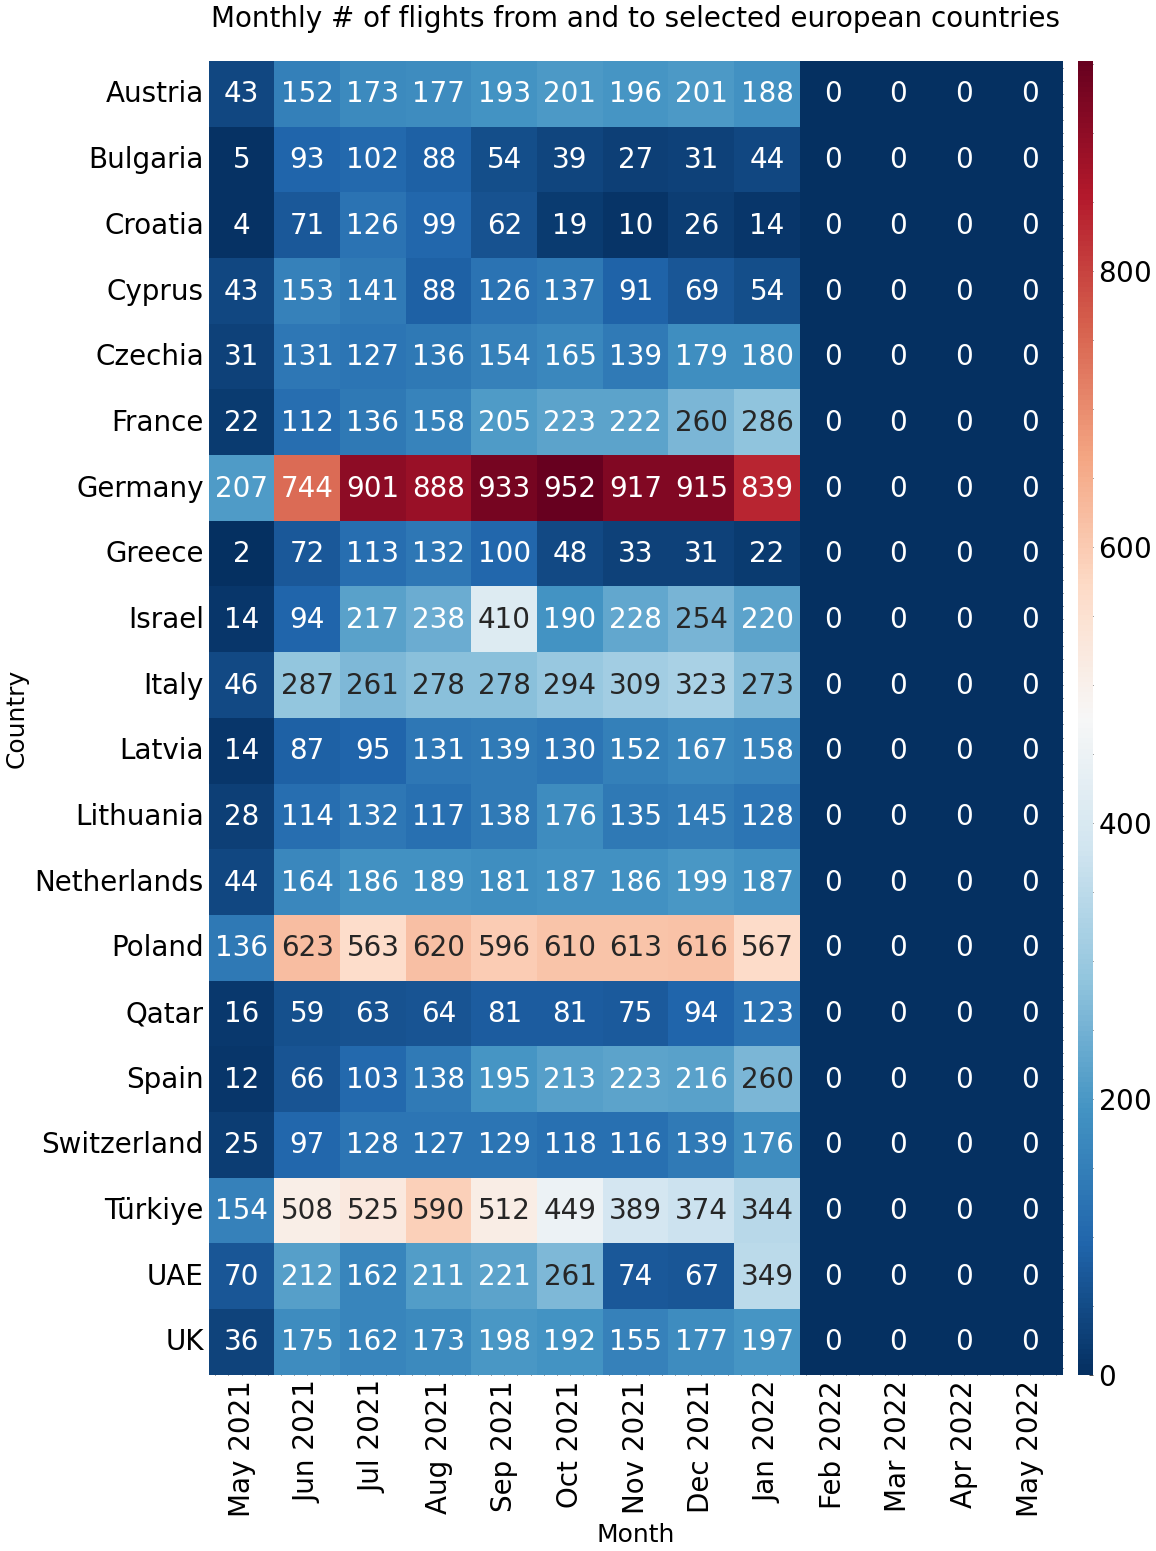

In [19]:
f, (ax) = plt.subplots(1,1,figsize=(16,16))#, gridspec_kw=grid_kws)
heatmap = heatmap.rename(columns={'United Arab Emirates':'UAE', 'United Kingdom':'UK'})
ax = sns.heatmap(heatmap.T, ax=ax,
                 square=True, cmap='RdBu_r',  annot=True, fmt=".0f",
                 cbar_kws={"orientation": "vertical", "pad": 0.01, "aspect": 85, "fraction": 0.047*(heatmap.shape[1]/heatmap.shape[0])})
ax.set_title("Monthly # of flights from and to selected european countries", y=1.02)
ax.set_ylabel("Country")
ax.set_xlabel("Month")
plt.tight_layout()
plt.savefig('monthly.png', bbox_inches=None, dpi=150)

In [ ]:
border_isos = [
    'PL',
    'RO',
    'HU',
    'SK',
    'BY',
    'MD'
]
border_country_flights = get_flights(s_flights, border_isos).dropna()
cons = border_country_flights.apply(lambda r: sorted([r['dep_country'], r['arr_country']]), axis = 1).value_counts().reset_index()

def get_source(idx):
    for c in border_isos:
        if c in idx:
            return idx[idx.index(c)]

def get_target(idx):
    for c in border_isos:
        if c in idx:
            return idx[not idx.index(c)]
            
cons['source'] = cons['index'].apply(get_source)
cons['target'] = cons['index'].apply(get_target)
cons = cons.drop(columns = 'index')
cons = cons[cons['source'] != cons['target']]

In [ ]:
nodes = [['Iso', 'Label', 'Color'],
        ['PL','Poland','#ffd76d'],
        ['RO','Romania','#6da9e1'],
        ['HU','Hungary','#449E9E'],
        ['SK','Slovakia','#fc824a'],
        ['BY','Belarus','#7bc184'],
        ['MD','Moldova','#d897a3'],]

targets = pd.concat([border_country_flights['dep_country'], border_country_flights['arr_country']]).unique()
targets = targets[~np.isin(targets, border_isos)]
nodes += list(map(lambda x: [x, x, '#f0f0f0'], targets))

In [ ]:
cons['index'].apply(lambda x: any(c in x for c in border_isos°

In [ ]:
def get_source(idx):
    for c in border_isos:
        if c in idx:
            return idx[idx.index(c)]

def get_target(idx):
    for c in border_isos:
        if c in idx:
            return idx[not idx.index(c)]

cons['index'].apply(get_source)

In [ ]:
[1,2][not 0]

In [34]:
s_flights['time'] = pd.to_datetime(s_flights['time'].dt.date)

In [35]:
s_flights.to_csv('s_flights.csv', index=False)

In [36]:
pd.to_datetime(pd.read_csv('s_flights.csv')['time'])

0         2016-03-11
1         2016-03-12
2         2016-03-12
3         2016-03-12
4         2016-03-13
             ...    
3635908   2023-09-22
3635909   2023-09-22
3635910   2023-09-22
3635911   2023-09-22
3635912   2023-09-22
Name: time, Length: 3635913, dtype: datetime64[ns]

In [12]:
def plot_date(df, date=None, ax=None, cbar=True, vmin=False, vmax=False, projection=PlateCarree(), bounds=None, figsize=None, label_prop={'fontsize': 20}, arc_height = 0.1):
    if date:
        data = df[df['time'] == date]
    else:
        data = df
    paths = get_paths(data)
    data = paths.groupby(['path_init', 'path_end'], as_index=True).size().reset_index()
    data.columns = list(data.columns.values[:-1])+['c']
    data = data.sort_values('c')

    data['curve'] = data[['path_init', 'path_end']].apply(lambda row: hanging_line(row['path_init'], row['path_end'], arc_height), axis=1)

    if vmax == False:
        vmax = data['c'].max()
    if vmin == False:
        vmin = data['c'].min()

    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Reds)

    crs = PlateCarree()
    
    if not ax:
        if figsize:
            fig, ax = plt.subplots(1, 1, frameon=True, figsize=figsize, dpi=150, subplot_kw=dict(projection=projection))
        else:
            fig, ax = plt.subplots(1, 1, frameon=True, subplot_kw=dict(projection=projection))
    
    ax.add_feature(lakes(scale="50m"))
    ax.add_feature(ocean(scale="50m"))
    
    ax.add_feature(COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(BORDERS.with_scale("50m"), lw=0.3)

    ax.set_facecolor("#dedede")

    gl = ax.gridlines(crs=crs, draw_labels=True,
                      linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
    
    if cbar:
        cb = plt.colorbar(mapper, ax=ax, orientation='horizontal', shrink=0.5, pad=0.04, aspect=40, label = '# of flights')

    c=1
    m=len(data.dropna())
    for index, row in data.dropna().iterrows():
        print(f"{c}/{m}", end="\r")
        c+=1
        ax.plot(row['curve'][0], row['curve'][1], c=mapper.to_rgba(row['c']), linewidth = 2, zorder=100+row['c'], transform=crs)
        ax.scatter([row['path_init'][0], row['path_end'][0]], [row['path_init'][1], row['path_end'][1]], s=np.log(row['c']+1)*10, c=mapper.to_rgba(row['c']), zorder=100+row['c'], transform=crs)

    text = AnchoredText(
        datetime.strftime(date, '%B %d, %Y'),
        loc=1,
        frameon=True,
        prop = label_prop
    )
    
    text.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(text)

    if not bounds:
        # lon0, lat0, lon1, lat1s
        lon0 = data[['dep_lon', 'arr_lon']].min().min()
        lat0 = data[['dep_lat', 'arr_lat']].min().min()
        lon1 = data[['dep_lon', 'arr_lon']].max().max()
        lat1 = data[['dep_lat', 'arr_lat']].max().max()
        bounds = [lat0-10, lat1+10, lon0-10, lon1+10]
    ax.set_extent(bounds, crs)
    return ax